In [1]:
import pandas as pd
import numpy as np

In [4]:
room = pd.read_csv("Occupancy_Estimation.csv")
room.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [53]:
room.tail()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.0,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.0,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.0,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.0,0,0,0
10128,2018/01/11,09:00:09,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.05,0.06,0.08,345,0.0,0,0,0


In [5]:
room.shape

(10129, 19)

In [61]:
room.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [9]:
room.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [10]:
room.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [13]:
room['S1_Temp'].unique()

array([24.94, 25.  , 25.06, 25.13, 25.19, 25.25, 25.31, 25.38, 25.44,
       25.5 , 25.56, 25.63, 25.69, 25.75, 25.81, 25.94, 26.  , 26.06,
       26.13, 26.19, 25.88, 26.25, 26.31, 26.38])

In [17]:
room.duplicated().sum()

0

In [62]:
room.isnull()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10125,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10126,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10127,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

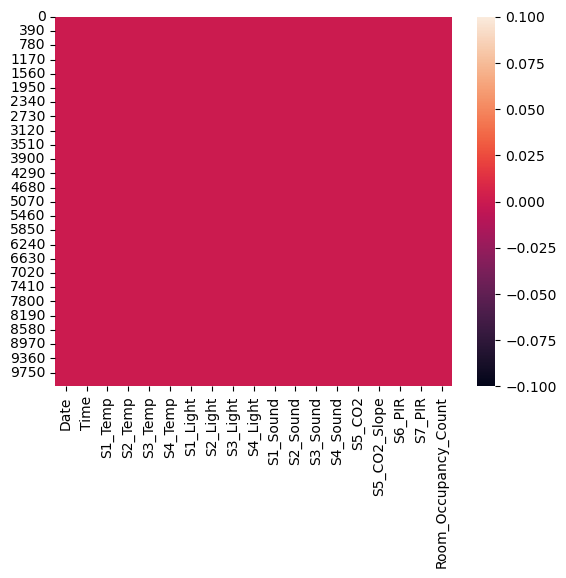

In [19]:
import seaborn as sns
sns.heatmap(room.isnull())

In [21]:
room.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [54]:
room.corr()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
S1_Temp,1.000000,0.799707,0.948839,0.855279,0.680743,0.548735,0.645163,0.212217,0.436099,0.391137,0.438769,0.355826,0.866718,0.137391,0.436363,0.474077,0.700868
S2_Temp,0.799707,1.000000,0.765525,0.696581,0.639773,0.645987,0.607349,0.370897,0.438274,0.409545,0.427133,0.378724,0.743722,0.202547,0.476901,0.465884,0.671263
S3_Temp,0.948839,0.765525,1.000000,0.885186,0.594311,0.500054,0.642601,0.301419,0.375183,0.344026,0.398177,0.326182,0.821308,0.095842,0.403355,0.460309,0.652047
S4_Temp,0.855279,0.696581,0.885186,1.000000,0.581482,0.456350,0.588459,0.386871,0.355111,0.312594,0.340808,0.294939,0.650320,0.106208,0.340000,0.339037,0.526509
S1_Light,0.680743,0.639773,0.594311,0.581482,1.000000,0.842090,0.816438,0.510853,0.601166,0.534274,0.494080,0.441712,0.602740,0.498185,0.607159,0.545213,0.849058
S2_Light,0.548735,0.645987,0.500054,0.456350,0.842090,1.000000,0.709579,0.458914,0.503021,0.560630,0.439269,0.413932,0.566764,0.493281,0.554658,0.556797,0.788764
S3_Light,0.645163,0.607349,0.642601,0.588459,0.816438,0.709579,1.000000,0.579484,0.502606,0.434859,0.577151,0.473606,0.650829,0.447708,0.501836,0.577815,0.793081
S4_Light,0.212217,0.370897,0.301419,0.386871,0.510853,0.458914,0.579484,1.000000,0.293632,0.303949,0.169702,0.200793,0.148608,0.212718,0.324545,0.220196,0.355715
S1_Sound,0.436099,0.438274,0.375183,0.355111,0.601166,0.503021,0.502606,0.293632,1.000000,0.560062,0.540736,0.557733,0.391903,0.335772,0.522015,0.463040,0.573748
S2_Sound,0.391137,0.409545,0.344026,0.312594,0.534274,0.560630,0.434859,0.303949,0.560062,1.000000,0.529830,0.578635,0.333836,0.357235,0.485697,0.507231,0.557853


<AxesSubplot:>

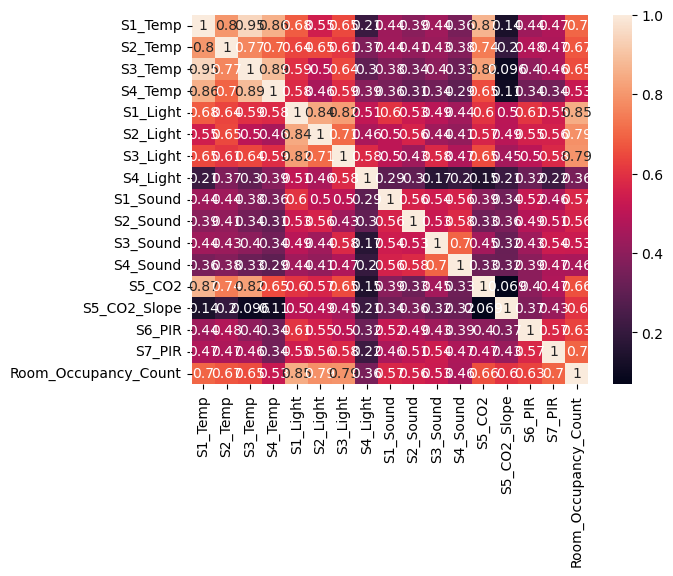

In [30]:
sns.heatmap(room.corr(),annot=True)

In [36]:
room.iloc[1:5,0:18]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0


array([[<AxesSubplot:title={'center':'S1_Temp'}>,
        <AxesSubplot:title={'center':'S2_Temp'}>,
        <AxesSubplot:title={'center':'S3_Temp'}>,
        <AxesSubplot:title={'center':'S4_Temp'}>],
       [<AxesSubplot:title={'center':'S1_Light'}>,
        <AxesSubplot:title={'center':'S2_Light'}>,
        <AxesSubplot:title={'center':'S3_Light'}>,
        <AxesSubplot:title={'center':'S4_Light'}>],
       [<AxesSubplot:title={'center':'S1_Sound'}>,
        <AxesSubplot:title={'center':'S2_Sound'}>,
        <AxesSubplot:title={'center':'S3_Sound'}>,
        <AxesSubplot:title={'center':'S4_Sound'}>],
       [<AxesSubplot:title={'center':'S5_CO2'}>,
        <AxesSubplot:title={'center':'S5_CO2_Slope'}>,
        <AxesSubplot:title={'center':'S6_PIR'}>,
        <AxesSubplot:title={'center':'S7_PIR'}>],
       [<AxesSubplot:title={'center':'Room_Occupancy_Count'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

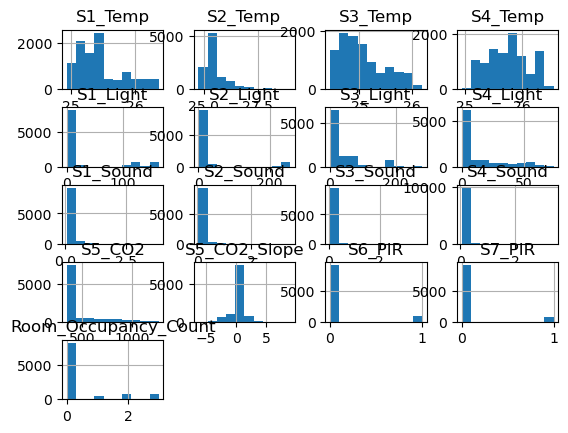

In [38]:
room.hist()

In [47]:
room.groupby(["S1_Temp"])['S1_Sound','S1_Light'].agg(["mean","min","max"])

C:\Users\limishra\AppData\Local\Temp\ipykernel_19652\909410470.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  room.groupby(["S1_Temp"])['S1_Sound','S1_Light'].agg(["mean","min","max"])


S1_Sound                S1_Light          
             mean   min   max        mean  min  max
S1_Temp                                            
24.94    0.505000  0.08  0.93  121.000000  121  121
25.00    0.125200  0.07  3.84   12.944000    0  122
25.06    0.082804  0.06  2.20    5.148744    0  123
25.13    0.080531  0.06  1.57    4.070408    0  124
25.19    0.079386  0.06  1.44    4.574007    0  124
25.25    0.086444  0.06  1.19    5.755334    0  124
25.31    0.081453  0.06  1.85    4.900000    0  124
25.38    0.090527  0.06  2.79    5.259766    0  158
25.44    0.095212  0.06  3.51    5.371908    0  157
25.50    0.144505  0.06  2.01   13.955631    0  155
25.56    0.200366  0.06  2.12   29.743902    0  157
25.63    0.203092  0.06  1.62   27.797101    0  157
25.69    0.236770  0.06  2.36   35.929204    0  157
25.75    0.266545  0.06  3.83   26.630303    0  160
25.81    0.281107  0.06  3.47   32.098361    0  160
25.88    0.230000  0.06  1.61   50.606061    0  162
25.94    0.347226  0.06  3.30   94.119863    0  164
26.00    0.339585  0.06  3.46   82.259067    0  165
26.06    0.391724  0.06  3.84  104.008621    0  165
26.13    0.500058  0.06  3.02  103.150289    0  165
26.19    0.565299  0.06  3.88  111.007463    0  165
26.25    0.491007  0.06  3.06  132.615672    0  150
26.31    0.751958  0.07  3.39  136.699301    0  151
26.38    0.969474  0.14  3.10  136.684211    0  150

In [48]:
room.groupby(["Room_Occupancy_Count"]).mean()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
Room_Occupancy_Count,,,,,,,,,,,,,,,,
0,25.336365,25.371105,24.929206,25.659785,2.686558,3.053354,13.368498,9.234565,0.076895,0.052558,0.063765,0.079680,404.446403,-0.308078,0.002431,0.001458
1,25.741590,25.831285,25.297211,26.091002,120.209150,31.427015,54.230937,37.579521,0.444619,0.137320,0.129216,0.094858,470.718954,0.310625,0.344227,0.041394
2,26.003837,26.207233,25.594893,26.183168,136.109626,134.804813,138.339572,30.482620,0.642553,0.527767,0.646217,0.240013,713.168449,1.141881,0.478610,0.427807
3,26.066023,26.719035,25.827954,26.187378,113.317003,177.430836,156.393372,25.757925,0.556297,0.469597,0.769813,0.249452,851.239193,2.145877,0.543228,0.655620


In [49]:
room['Room_Occupancy_Count'].unique()

array([1, 2, 3, 0], dtype=int64)

In [50]:
room['S7_PIR'].unique()

array([0, 1], dtype=int64)

In [52]:
room['S4_Light'].unique()

array([40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 69, 71, 72, 73, 74, 52, 51,
       42, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24,
       23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  0,  1,
        2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [55]:
room.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [64]:
room.value_counts()

Date        Time      S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count
2017/12/22  10:49:41  24.94    24.75    24.56    25.38    121       34        53        40        0.08      0.19      0.06      0.06      390      0.769231     0       0       1                       1
2017/12/25  21:43:16  25.44    25.44    25.06    25.94    0         0         0         0         0.07      0.05      0.06      0.11      355     -0.015385     0       0       0                       1
            21:39:42  25.38    25.44    25.06    25.88    0         0         0         0         0.08      0.05      0.06      0.10      355      0.038462     0       0       0                       1
            21:40:13  25.38    25.44    25.06    25.88    0         0         0         0         0.08      0.04      0.06      0.10      355      0.050000     0       0       0                    